In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
from os.path import join
load_data_dir = join('data', 'sift_pattern_matching')
save_data_dir = load_data_dir
os.makedirs(save_data_dir, exist_ok=True)


In [5]:
# Use SIFT to detect keypoints.
# contrastThreshold can be varied to limit the number of keypoints
# Other parameters can be found in OpenCV documentation. Some of them are useful (e.g. max keypoints)

contrastThreshold = 0.15
img = cv.imread(join(load_data_dir, '1_5.png'))
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY) 
sift = cv.SIFT_create(contrastThreshold = contrastThreshold)
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite(join(save_data_dir, '1_5_keypoints.png'),img)


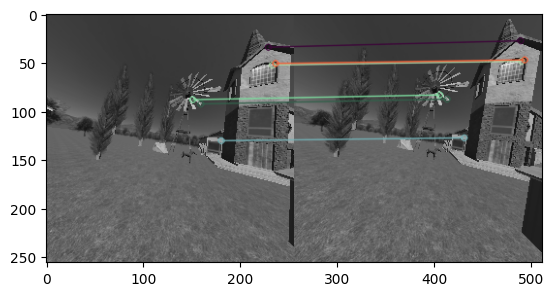

True

In [7]:
img1_pth = join(load_data_dir, '1_5.png')
img2_pth = join(load_data_dir, '2_10.png')

img1 = cv.imread(img1_pth,cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(img2_pth,cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create(contrastThreshold = 0.15)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

cv.imwrite(join(save_data_dir, 'featureMatching.png'),img3)